# Troy Quicksall
# DSC 630 T302
# Week 4

## 1. Remove any data that is not relevant to the patient’s ALS condition.

### Loading and inspecting the data

In [1]:
import pandas as pd
# To see all columns


als_df = pd.read_csv('als_data.csv')

als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [2]:
# Removing id columns, "ID" and "SubjectID"

als_df = als_df.drop(['ID', 'SubjectID'], axis=1)

### Using correlation matrix to identify redundant variables as described in the textbook, "Applied Predictive Analytics"

In [3]:
import numpy as np
correlation_matrix = als_df.corr()
correlation_matrix

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
Age_mean,1.000000,-0.276195,-0.349024,-0.297121,0.053197,-0.015301,0.049054,0.057733,0.041025,0.038163,...,0.005432,-0.039712,0.080449,0.071736,0.089325,0.065092,0.036559,-0.001532,0.002561,-0.008615
Albumin_max,-0.276195,1.000000,0.780141,0.596662,0.223350,0.037438,0.113349,0.090439,0.058077,-0.072609,...,0.013677,-0.040877,-0.048029,0.080261,0.057346,0.042903,-0.064183,0.075413,-0.046885,-0.138430
Albumin_median,-0.349024,0.780141,1.000000,0.761269,-0.091822,0.059234,0.153280,0.128122,0.099099,-0.099966,...,0.007380,-0.017818,-0.069380,0.097823,0.084183,0.072317,-0.088370,0.056894,-0.042497,-0.118506
Albumin_min,-0.297121,0.596662,0.761269,1.000000,-0.369015,0.112154,0.158924,0.172940,0.188007,-0.151358,...,0.046761,0.074240,-0.086457,0.095974,0.113639,0.134409,-0.114685,0.034555,-0.001877,-0.049783
Albumin_range,0.053197,0.223350,-0.091822,-0.369015,1.000000,-0.226123,-0.142900,-0.166473,-0.188223,0.264209,...,0.030864,0.020971,0.177163,-0.086105,-0.110648,-0.124018,0.211769,-0.011823,0.038553,0.022866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trunk_min,0.065092,0.042903,0.072317,0.134409,-0.124018,0.488530,0.590336,0.729634,0.845515,-0.576628,...,0.029731,0.059450,-0.098606,0.633160,0.791262,1.000000,-0.620503,-0.067544,-0.013682,0.020322
trunk_range,0.036559,-0.064183,-0.088370,-0.114685,0.211769,-0.686407,-0.022388,-0.252393,-0.549288,0.815212,...,-0.008379,-0.007871,0.173634,0.082453,-0.209821,-0.620503,1.000000,0.013725,0.051023,0.021281
Urine.Ph_max,-0.001532,0.075413,0.056894,0.034555,-0.011823,-0.037779,-0.034254,-0.072189,-0.089458,0.043252,...,-0.052230,-0.058276,0.005643,-0.031953,-0.046946,-0.067544,0.013725,1.000000,0.487953,0.073412
Urine.Ph_median,0.002561,-0.046885,-0.042497,-0.001877,0.038553,-0.064897,-0.031396,-0.038370,-0.024922,0.079291,...,0.040815,0.109544,0.021791,-0.041352,-0.023227,-0.013682,0.051023,0.487953,1.000000,0.525513


Any variables that have a high correlation, or an absolute value greater than .9, are variables which contain information already conveyed in one or more other variables. 

In [4]:
#Creating a correlation matrix of booleans based on whether the absolute value is greater than .9 
# and then getting the indices.

threshold = .9
[(i, n) for i,n in zip(*np.where(np.abs(correlation_matrix.values) > threshold)) if i!=n]

[(55, 56),
 (55, 57),
 (56, 55),
 (56, 57),
 (57, 55),
 (57, 56),
 (67, 68),
 (68, 67),
 (74, 75),
 (75, 74)]

The columns that show redundancies are 'Hematocrit_max', 'Hematocrit_median', 'Hematocrit_min', 'mouth_max', 'mouth_median', 'Platelets_median', and 'Platelets_min'. Since these variables are the measurent, just either the 'max', 'min', or 'median', I will drop the columns except for median.

In [5]:
als_df = als_df.drop(['Hematocrit_max', 'Hematocrit_min', 'mouth_max', 'Platelets_min'], axis=1)

## 2. Apply a standard scalar to the data.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Applying StandardScaler from sklearn
scaler = StandardScaler()
als_df_std = scaler.fit_transform(als_df)



## 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

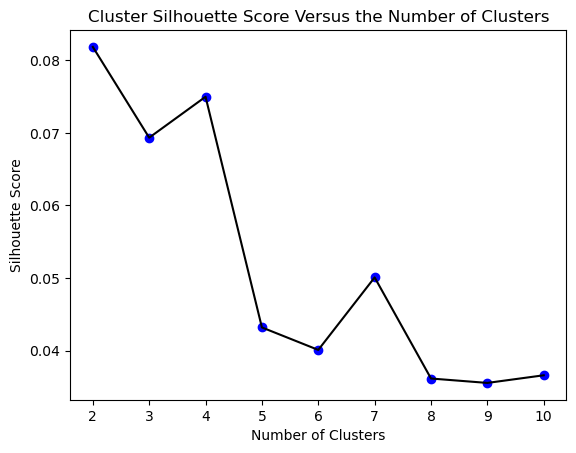

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# initializing empty scores array
silhouette_scores = []

# looping through number of clusters and creating kmeans cluster uing standardized data
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    km.fit_predict(als_df_std)
    score = silhouette_score(als_df_std, km.labels_, metric='euclidean')
    silhouette_scores.append(score)
    
    
plt.figure()
plt.plot(range_n_clusters, silhouette_scores, 'bo', range_n_clusters, silhouette_scores, 'k')
plt.title('Cluster Silhouette Score Versus the Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()


## 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

A higher silhouette score indicates a better defined cluster, and therefore we would want to choose the k with the highest score. In this case that is 2.

## 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [8]:
from sklearn.model_selection import train_test_split

# Optimal cluster of 2
kmeans = KMeans(n_clusters = 2, random_state=42, n_init=10)
kmeans.fit(als_df_std)

KMeans(n_clusters=2, n_init=10, random_state=42)

## 6. Fit a PCA transformation with two features to the scaled data.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fitting and then transforming with PCA on the scaled data
principalComponents = pca.fit(als_df_std)
pca_data = pca.transform(als_df_std)

# Converting to a dataframe 
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])



## 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

Text(0.5, 1.0, 'Scatterplot of the PCA Transformed Data by Cluster')

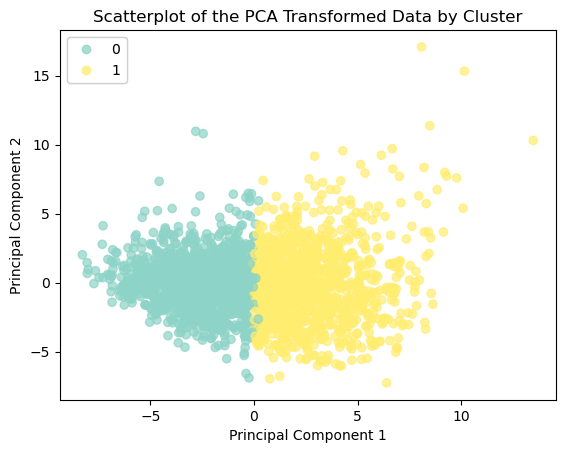

In [10]:
# Specifying column in dataframe for which cluster it belongs to
pca_df['cluster'] = pd.Categorical(kmeans.labels_)
fig,ax = plt.subplots()
# Creating a scatter of the PCA data and differentiating cluster by color
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'],c=pca_df['cluster'],cmap='Set3',alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Scatterplot of the PCA Transformed Data by Cluster')


## 8. Summarize your results and make a conclusion.

The purpose of PCA is to reduce a dataset with many dimensions to less while still maintaining most of the information. K-means clustering is a method used to cluster similar data points together. By using PCA along with K-means, we can improve performance by reducing dimensionality. Additionally, we can see that by reducing the feature dimensions, we also reduce noise leading to more clearly defined clusters. Therefore, we can see in the visual the clusters are clearly separated, meaning that the ALS population can be separated into two distinct groups.